In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from scipy import stats
import matplotlib.pyplot as plt
from pylab import mpl
import datetime as dt


mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

data = pdr.DataReader('000001.SS','yahoo',start=dt.date(2019,1,1),end=dt.date(2020,1,1))['Adj Close']

data.head(5)


Date
2019-01-02    2465.291016
2019-01-03    2464.363037
2019-01-04    2514.867920
2019-01-07    2533.089111
2019-01-08    2526.461914
Name: Adj Close, dtype: float64

In [2]:
returns = data.pct_change().dropna()#简单收益率

returns.head(5)


Date
2019-01-03   -0.000376
2019-01-04    0.020494
2019-01-07    0.007245
2019-01-08   -0.002616
2019-01-09    0.007078
Name: Adj Close, dtype: float64

In [3]:
dt = np.array(data)
logre=pd.Series(np.log(dt[1:len(dt)]/dt[0:len(dt)-1]))#对数收益率
logre.index=returns.index
logre.head()


Date
2019-01-03   -0.000376
2019-01-04    0.020287
2019-01-07    0.007219
2019-01-08   -0.002620
2019-01-09    0.007053
dtype: float64

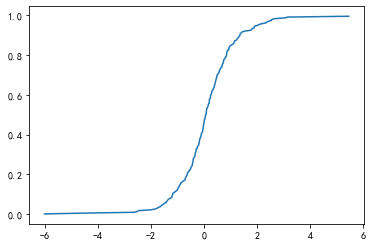

In [39]:
sorted_=np.sort(logre*100)#对对数收益率排序
y=np.arange(len(sorted_))/float(len(sorted_))#生成纵轴坐标范围(0,1)
plt.plot(sorted_,y)

((array([-2.76339822, -2.46025022, -2.28802553, -2.16499522, -2.06799953,
         -1.98727361, -1.9177391 , -1.85640314, -1.80134745, -1.75126571,
         -1.70522662, -1.66254183, -1.62268761, -1.58525584, -1.54992202,
         -1.5164237 , -1.48454548, -1.4541083 , -1.42496161, -1.39697757,
         -1.37004667, -1.34407434, -1.3189783 , -1.29468655, -1.27113564,
         -1.2482694 , -1.22603785, -1.20439628, -1.18330456, -1.16272651,
         -1.14262939, -1.12298347, -1.10376168, -1.08493928, -1.06649361,
         -1.04840385, -1.03065081, -1.01321681, -0.99608544, -0.97924154,
         -0.96267098, -0.94636062, -0.93029822, -0.91447232, -0.89887221,
         -0.88348784, -0.86830979, -0.85332918, -0.83853768, -0.82392739,
         -0.80949091, -0.79522119, -0.78111159, -0.76715581, -0.75334787,
         -0.7396821 , -0.72615308, -0.71275569, -0.69948503, -0.68633643,
         -0.67330543, -0.66038778, -0.64757939, -0.63487638, -0.62227499,
         -0.60977166, -0.59736293, -0.

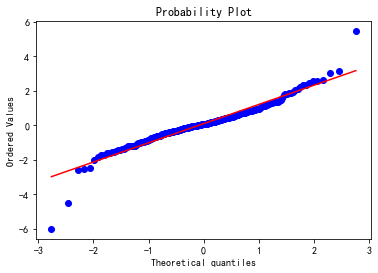

In [40]:
#若只画上证指数分布的散点图（先求(0,1)之间的概率对应标准正态分布下的分位点）：
#SH=stats.norm.ppf(y);plt.scatter(SH,sorted_)
#画上证指数分布的散点图、正态分布的分位点图构成的QQ图：
stats.probplot(sorted_,dist="norm",plot=plt)


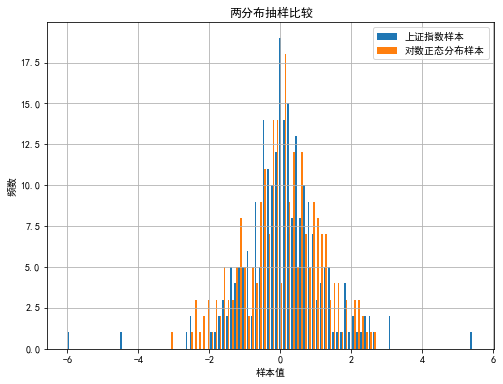

In [43]:
logdf=pd.Series(np.random.normal(0,1,241))
a=pd.concat([pd.Series(sorted_),logdf],axis=1)
a.columns=['上证指数样本','标准正态分布样本']
a=a.values#数据框转换为array数组
plt.figure(figsize=(8,6))
plt.hist(a,label=['上证指数样本','对数正态分布样本'],bins=100)
plt.xlabel('样本值')
plt.ylabel('频数')
plt.title('两分布抽样比较')
plt.legend()
plt.grid()
